In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Unzip file 

In [19]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 65.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 23.2 MB/s eta 0:00:00


In [20]:
import py7zr

archive = py7zr.SevenZipFile('/kaggle/input/cifar-10/train.7z', mode='r')
archive.extractall()
archive.close()

In [21]:
filenames = os.listdir('train')
filenames[0: 5]

['2037.png', '33501.png', '45655.png', '22377.png', '46229.png']

In [22]:
len(filenames)

50000

In [23]:
import pandas as pd 

**Labels Data**

In [24]:
label_df = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')

In [25]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [26]:
label_df.shape

(50000, 2)

Image name is jsut the id in label_df 

In [27]:
# print the label of 28980.png 
label_df[label_df['id'] == 28980]

,id,label
28979,28980,ship


In [28]:
type(filenames)

list

In [29]:
label_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [30]:
sorted(label_df['label'].unique())

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

OneHotEncoded manually in label_df['label'] column to convert categorical values to numeric

In [31]:
label_names = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
label_to_num = [label_names[i] for i in label_df['label']]

In [32]:
label_to_num[0:5]


[6, 9, 9, 4, 1]

In [33]:
label_df[0:5]
'''
frog is 6
truck is 9
deer is 4
automobile is 1 
'''

'\nfrog is 6\ntruck is 9\ndeer is 4\nautomobile is 1 \n'

**Display Images using cv2**

In [34]:
import cv2 
import matplotlib.pyplot as plt
from PIL import Image

In [35]:
!ls

train


In [36]:
filenames[1]

'33501.png'

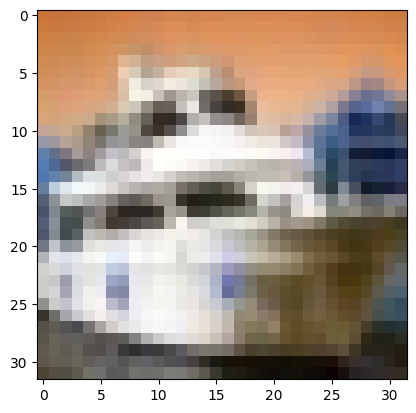

In [37]:
img = cv2.imread('train/28980.png')
plt.imshow(img)

In [38]:
id2list = list(label_df['id'])


**Image Preprocessing**

Convert images into numpy arrays

In [39]:
train_data_folder = 'train/'
# empty list to hold all the converted numpy images
np_img = []

for id in id2list:
    img = Image.open(train_data_folder + str(id) + '.png') # read image with Pillow object
    img = np.array(img)
    np_img.append(img)

In [40]:
type(np_img[0])

numpy.ndarray

In [41]:
np_img[0].shape

(32, 32, 3)

**Convert image list and label list into numpy arrays**

In [42]:
X = np.array(np_img)
y = np.array(label_to_num)

In [43]:
print(f'X shape: {X.shape} \nY shape : {y.shape}')

X shape: (50000, 32, 32, 3) 
Y shape : (50000,)


Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3)


Normalize X_train and X_test from 0-255 to 0-1 which results better accuracy while training

In [46]:
X_train_scaled = X_train / 255 
X_test_scaled = X_test / 255

In [47]:
X_test.shape

(10000, 32, 32, 3)

In [48]:
X_train_scaled[0]

array([[[0.13333333, 0.14117647, 0.16862745],
        [0.14509804, 0.14509804, 0.2       ],
        [0.17254902, 0.17254902, 0.25098039],
        ...,
        [0.24313725, 0.28627451, 0.36470588],
        [0.20392157, 0.24705882, 0.3254902 ],
        [0.17647059, 0.22352941, 0.30196078]],

       [[0.1372549 , 0.1372549 , 0.14509804],
        [0.13333333, 0.13333333, 0.15686275],
        [0.13333333, 0.12941176, 0.16862745],
        ...,
        [0.22745098, 0.27058824, 0.34901961],
        [0.19607843, 0.23529412, 0.31372549],
        [0.18431373, 0.22745098, 0.30588235]],

       [[0.13333333, 0.12941176, 0.1372549 ],
        [0.12941176, 0.1254902 , 0.14117647],
        [0.12941176, 0.1254902 , 0.14901961],
        ...,
        [0.25882353, 0.30196078, 0.38039216],
        [0.2       , 0.24313725, 0.32156863],
        [0.20784314, 0.25098039, 0.32941176]],

       ...,

       [[0.1254902 , 0.1254902 , 0.14901961],
        [0.1254902 , 0.12156863, 0.14509804],
        [0.12941176, 0

**Building a Neural Network**

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32,), output.shape=(32, 10)

to resolve this above error we need to convert y_train raw to to_categorical

Because : i have 10 probabilities and i need to tell the models that out of 10 labels 1 is right rest are 0s and other is wrong because i have softmax output is 10 

In [50]:
y_train[:5]

array([6, 2, 5, 6, 3])

In [51]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [52]:
model = models.Sequential([
    layers.Conv2D(filters=3, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train_scaled, y_train_cat, epochs=5, validation_data=(X_test_scaled, y_test_cat))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2869 - loss: 1.9739 - val_accuracy: 0.4202 - val_loss: 1.6420
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4699 - loss: 1.5212 - val_accuracy: 0.4711 - val_loss: 1.5046
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5273 - loss: 1.3440 - val_accuracy: 0.4792 - val_loss: 1.4576
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5668 - loss: 1.2420 - val_accuracy: 0.4797 - val_loss: 1.4799
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6000 - loss: 1.1466 - val_accuracy: 0.4920 - val_loss: 1.4644


In [53]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4979 - loss: 1.4511


In [54]:
test_acc

0.492000013589859

In [55]:
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [66]:
resnet_base_model = ResNet50(weights='imagenet', include_top=False)
# resnet_base_model.trainable = False

In [67]:
m_trainable = [i for i in resnet_base_model.layers[:30]]

In [68]:
partial_resnet = models.Model(inputs=resnet_base_model.input, outputs=resnet_base_model.layers[29].output)

In [83]:
res_model = Sequential([
    partial_resnet,
    layers.GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

res_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

earlyStopping = EarlyStopping(patience=5, monitor='val_loss')
mcp = ModelCheckpoint(monitor='val_loss', filepath='test_model.keras')

hist = res_model.fit(X_train_scaled, y_train_cat, epochs=30, validation_data=(X_test_scaled, y_test_cat), callbacks=[earlyStopping, mcp])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 43ms/step - accuracy: 0.7969 - loss: 0.5997 - val_accuracy: 0.7232 - val_loss: 0.9348
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.8740 - loss: 0.3612 - val_accuracy: 0.6937 - val_loss: 1.0916
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.8905 - loss: 0.3187 - val_accuracy: 0.6406 - val_loss: 1.4104
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 40ms/step - accuracy: 0.8943 - loss: 0.3043 - val_accuracy: 0.6943 - val_loss: 1.0802
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.8963 - loss: 0.2923 - val_accuracy: 0.7210 - val_loss: 1.0132
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.9108 - loss: 0.2657 - val_accuracy: 0.7491 - val_loss: 0.9041
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.9104 - loss: 0.2541 - val_accuracy: 0.7334 - val_loss: 0.9552
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.9136 -

In [84]:
res_model.evaluate(X_test_scaled, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7178 - loss: 1.2312


[1.2632417678833008, 0.7103000283241272]

In [85]:
import matplotlib.pyplot as plt

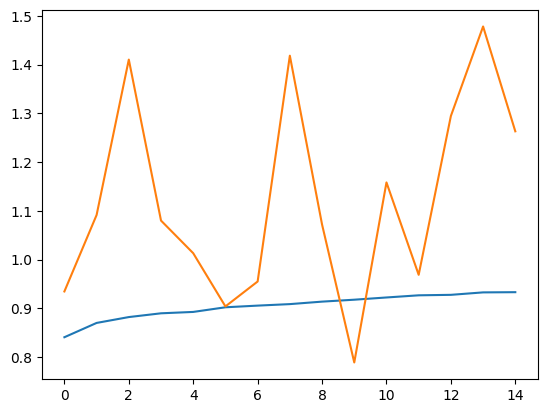

In [86]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])

In [78]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])